<h1> T03. Introduction to ARIMA </h1>

By William Yu, updated 2/20/2024

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
from fredapi import Fred
fred = Fred(api_key='8ba88b5e6908c85ddeaff9993a4b4aaa') #!!! This is mine; use yours

In [3]:
cshome = fred.get_series('SPCS10RSA')
cshome.tail()

2023-07-01    327.882443
2023-08-01    330.861752
2023-09-01    333.116849
2023-10-01    335.214796
2023-11-01    335.785083
dtype: float64

<AxesSubplot:title={'center':'Home Price Return'}>

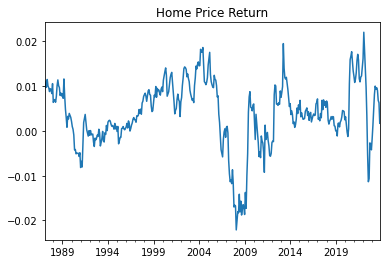

In [4]:
# Convert home price to home price growth rate (continousely compounded)
cshomer = np.log(cshome).diff().dropna()
cshomer.plot(title="Home Price Return")

In [5]:
# Plotting ACF
def plot_acf(data, lags, title=""):
    sm.graphics.tsa.plot_acf(data, lags=lags)
    plt.title(title)
    plt.show()

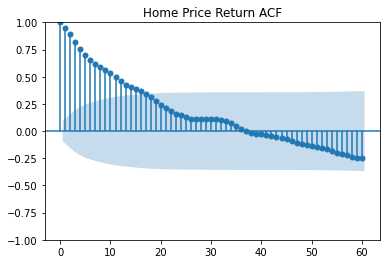

In [6]:
# ACF plots
plot_acf(cshomer, lags=60, title="Home Price Return ACF")

In [7]:
# AR(1)
model6a = ARIMA(cshomer, order=(1, 0, 0)).fit()
# MA(1)
model6b = ARIMA(cshomer, order=(0, 0, 1)).fit()
# AR(2)
model6d = ARIMA(cshomer, order=(2, 0, 0)).fit()
# MA(2)
model6e = ARIMA(cshomer, order=(0, 0, 2)).fit()
# ARMA(2, 1)
model6f = ARIMA(cshomer, order=(2, 0, 1)).fit()
# ARMA(1, 2)
model6g = ARIMA(cshomer, order=(1, 0, 2)).fit()
# ARMA(2, 2)
model6h = ARIMA(cshomer, order=(2, 0, 2)).fit()

print(model6d.summary())
print(model6g.summary())
print(model6h.summary())

C:\Users\wiyu\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\wiyu\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\wiyu\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\wiyu\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\wiyu\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self.

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  442
Model:                 ARIMA(2, 0, 0)   Log Likelihood                2063.585
Date:                Tue, 20 Feb 2024   AIC                          -4119.169
Time:                        16:21:29   BIC                          -4102.804
Sample:                    02-01-1987   HQIC                         -4112.714
                         - 11-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0038      0.002      1.922      0.055   -7.44e-05       0.008
ar.L1          1.0751      0.032     33.783      0.000       1.013       1.138
ar.L2         -0.1314      0.032     -4.061      0.0

In [8]:
# Function to compute model accuracy
def accuracy(model, data):
    predictions = model.predict(start=0, end=len(data)-1, dynamic=False)
    mae = mean_absolute_error(data, predictions)
    mse = mean_squared_error(data, predictions)
    rmse = np.sqrt(mse)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse}

In [9]:
# Display accuracy metrics
print("Model 6a:", accuracy(model6a, cshomer))
print("Model 6b:", accuracy(model6b, cshomer))
print("Model 6d:", accuracy(model6d, cshomer))
print("Model 6e:", accuracy(model6e, cshomer))
print("Model 6f:", accuracy(model6f, cshomer))
print("Model 6g:", accuracy(model6g, cshomer))
print("Model 6h:", accuracy(model6h, cshomer))

Model 6a: {'MAE': 0.0016118255378155203, 'MSE': 5.325788258300012e-06, 'RMSE': 0.002307766941937598}
Model 6b: {'MAE': 0.0034741499384456837, 'MSE': 2.0821737332297034e-05, 'RMSE': 0.004563084190796509}
Model 6d: {'MAE': 0.001612805494158092, 'MSE': 5.23652830901461e-06, 'RMSE': 0.0022883461951843324}
Model 6e: {'MAE': 0.002524341737042609, 'MSE': 1.1380629872681786e-05, 'RMSE': 0.0033735189154178143}
Model 6f: {'MAE': 0.0016091277160621199, 'MSE': 5.319732806414589e-06, 'RMSE': 0.002306454596651447}
Model 6g: {'MAE': 0.001586900236746379, 'MSE': 5.0876269805837466e-06, 'RMSE': 0.002255576862043}
Model 6h: {'MAE': 0.0015868343813947733, 'MSE': 5.0857232982647426e-06, 'RMSE': 0.0022551548280028894}


In [119]:
# Forecast the next 24 months
forecast_values = model6h.get_forecast(steps=24).predicted_mean
forecast_values 

2023-08-01    0.007493
2023-09-01    0.007181
2023-10-01    0.006905
2023-11-01    0.006650
2023-12-01    0.006416
2024-01-01    0.006201
2024-02-01    0.006003
2024-03-01    0.005822
2024-04-01    0.005655
2024-05-01    0.005501
2024-06-01    0.005360
2024-07-01    0.005231
2024-08-01    0.005112
2024-09-01    0.005002
2024-10-01    0.004902
2024-11-01    0.004809
2024-12-01    0.004724
2025-01-01    0.004646
2025-02-01    0.004575
2025-03-01    0.004509
2025-04-01    0.004448
2025-05-01    0.004392
2025-06-01    0.004341
2025-07-01    0.004294
Freq: MS, Name: predicted_mean, dtype: float64

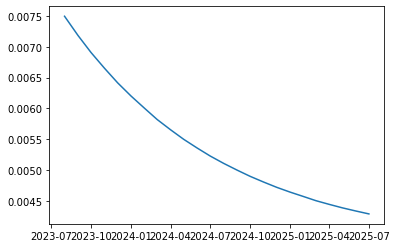

In [106]:
plt.plot(forecast_values)

<h3>SARIMA Model (Seasonal ARIMA Model) </h3>   

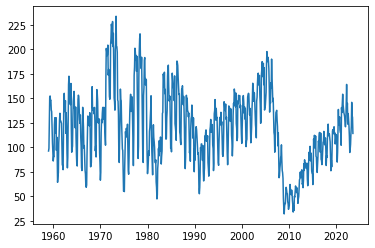

In [107]:
hs = fred.get_series('HOUSTNSA')
plt.plot(hs)

C:\Users\wiyu\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


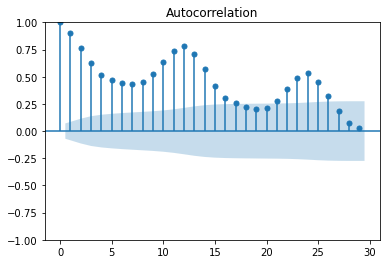

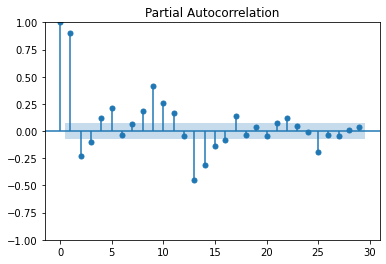

In [108]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(hs)
plot_pacf(hs)
plt.show()

In [110]:
model7i = SARIMAX(hs, order=(0, 1, 1), seasonal_order=(1, 0, 2, 12))
results = model7i.fit(disp=True)
print(results.summary())

C:\Users\wiyu\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\wiyu\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  776
Model:             SARIMAX(0, 1, 1)x(1, 0, [1, 2], 12)   Log Likelihood               -2940.412
Date:                                 Sat, 30 Sep 2023   AIC                           5890.824
Time:                                         18:15:41   BIC                           5914.088
Sample:                                     01-01-1959   HQIC                          5899.774
                                          - 08-01-2023                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3222      0.030    -10.872      0.000      -0.380      -0

In [111]:
for7i = results.get_forecast(steps=120)
mean_forecast = for7i.predicted_mean
confidence_intervals = for7i.conf_int()
mean_forecast

2023-09-01    116.424126
2023-10-01    115.317168
2023-11-01    103.723345
2023-12-01     94.360734
2024-01-01     95.332039
                 ...    
2033-04-01    121.772623
2033-05-01    125.750701
2033-06-01    127.281399
2033-07-01    124.822210
2033-08-01    120.212261
Freq: MS, Name: predicted_mean, Length: 120, dtype: float64

<h3>Pmdarima Library </h3>   

In [112]:
# !pip install pmdarima

In [113]:
# Auto ARIMA 
from pmdarima import auto_arima

model = auto_arima(cshomer, seasonal=False, trace=True, suppress_warnings=True, stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-4090.457, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-2952.783, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-4074.799, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-3385.900, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-4092.167, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-3668.728, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-4077.823, Time=0.03 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-4090.438, Time=0.07 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-3827.738, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-4071.125, Time=0.18 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-4087.684, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-4094.781, Time=0.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-3733.493, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-4079.436, Time=0.09 sec
 ARIMA(2,0,2)(0,0,0

In [114]:
prediction, confint = model.predict(n_periods=24, return_conf_int=True)
prediction

array([0.00752471, 0.0071728 , 0.00692646, 0.00669966, 0.00649083,
       0.00629857, 0.00612154, 0.00595855, 0.00580849, 0.00567032,
       0.0055431 , 0.00542597, 0.00531813, 0.00521884, 0.00512742,
       0.00504325, 0.00496575, 0.0048944 , 0.0048287 , 0.00476821,
       0.00471252, 0.00466124, 0.00461403, 0.00457056])

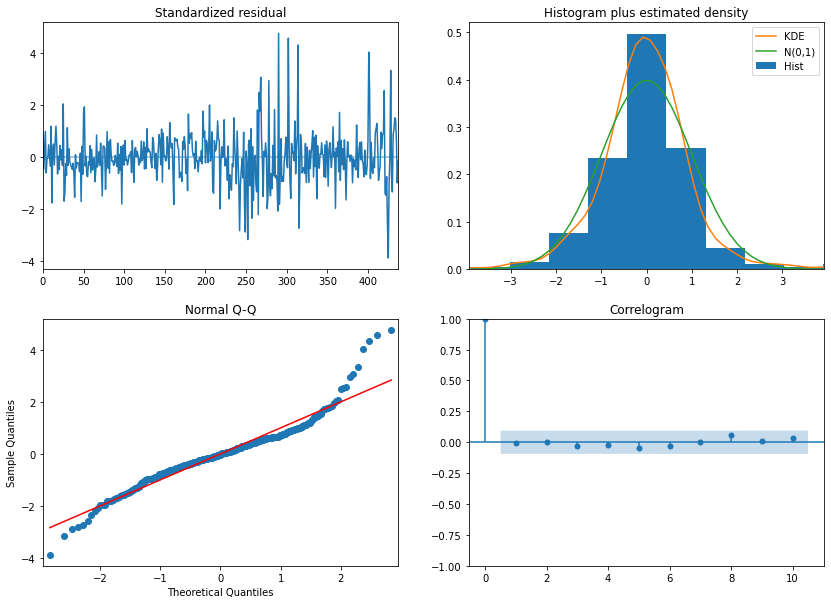

In [115]:
model.plot_diagnostics(figsize=(14,10))
plt.show()

In [116]:
model = auto_arima(hs, seasonal=True, m=12, trace=True, suppress_warnings=True, stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=5903.798, Time=1.72 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6577.530, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6139.048, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=6366.830, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=6575.531, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=1.61 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=1.44 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=5898.727, Time=5.60 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=6046.908, Time=4.91 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=5907.062, Time=7.16 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=5898.379, Time=5.59 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=4.74 sec
 ARIMA(1,1,2)(1,0,2)[12] intercept   : AIC=5896.820, Time=3.51 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=3.92 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : 

In [117]:
forecast, conf_int = model.predict(n_periods=120, return_conf_int=True)
forecast

array([116.42412621, 115.31716825, 103.72334468,  94.36073352,
        95.33203936,  96.49601728, 111.0966885 , 118.58252962,
       125.28863632, 125.20451046, 122.91815568, 116.65517371,
       115.6297162 , 115.09579774, 103.53662645,  95.0984624 ,
        95.7646695 ,  96.46956284, 111.46011785, 119.09395807,
       123.2187656 , 124.80592212, 122.25602723, 117.47604306,
       115.98552822, 115.45402165, 103.94706682,  95.54702064,
        96.21021827,  96.91192739, 111.83476528, 119.43412101,
       123.54029546, 125.1202823 , 122.58190609, 117.82351464,
       116.33973293, 115.81062734, 104.3556531 ,  95.99355261,
        96.65375436,  97.35229363, 112.2077203 , 119.77274732,
       123.86037288, 125.43322241, 122.90631286, 118.16941657,
       116.69233758, 116.16562213, 104.76239366,  96.43806745,
        97.09528686,  97.7906706 , 112.57899058, 120.10984395,
       124.1790044 , 125.74474887, 123.22925418, 118.51375596,
       117.04334941, 116.5190133 , 105.16729684,  96.88

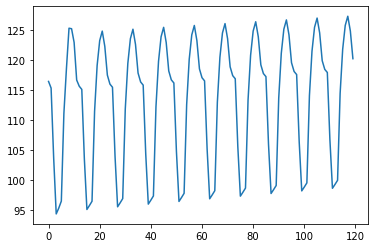

In [118]:
plt.plot(forecast)